## Waste Water Plots for Jake ##

In [14]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import xarray as xr

In [5]:
## No outfall file
base = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/base_again/SalishSea_1h_20230301_20230301_grid_T.nc')

In [6]:
## With clean freshwater outfall
tands = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands//SalishSea_1h_20230301_20230301_grid_T.nc')

In [54]:
## plan view 
def planview(base, new, field, it, ide, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[2], cmap=cm.balance, 
                                                              vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Depth {base.deptht[ide].values:.0f} m')

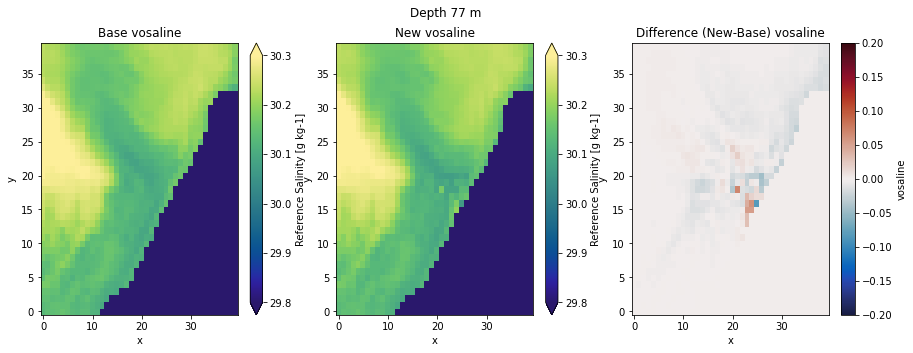

In [55]:
planview(base, tands, 'vosaline', 23, 25, cm.haline, 30.3, 29.8, 0.2)

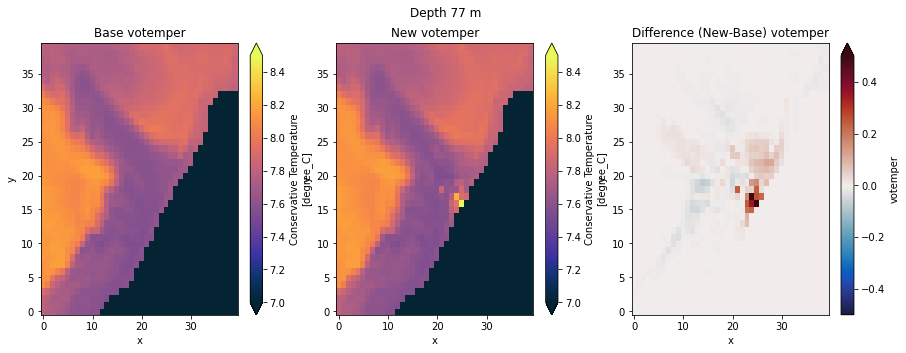

In [56]:
planview(base, tands, 'votemper', 23, 25, cm.thermal, 7, 8.5, 0.5)